Bellman_iter_V_initial=2.5, N_Bellman_iter = 1000, Bellman_iter_threshold=1e-5 can plot convergence trend

In [15]:
N_Delta = 10
Delta_list = np.logspace(-1, -3, num=N_Delta) #np.linspace(0.1, 0.0001, N_Delta)
V_star_list = np.zeros((N_Delta, dim_midprice_grid, dim_inventory_grid))

####### the value function for each Delta convergence used in current paper:
for i in range(N_Delta):
    Delta = Delta_list[i]
    env = MarketEnvironment(dim_price_grid, bound_inventory, dim_action_ask_price, dim_action_buy_price, Delta)
    env.reset()

    agent = QLearningAgent(env, dim_midprice_grid, dim_inventory_grid, dim_action_ask_price, dim_action_buy_price, Delta, 
                                UCB=False, N_RL_iter=1*10**4, N_learning_steps=1*10**4,
                            lr_exponent=0.501, exp_epoch=20,  exp=0.8, exp0=0.5, 
                            V_RL_iter_threshold = 0.065,
                            Bellman_iter_V_initial=2.5, N_Bellman_iter = 1000, Bellman_iter_threshold=1e-5)
    
    V_star_list[i, :, :] = agent.V_star

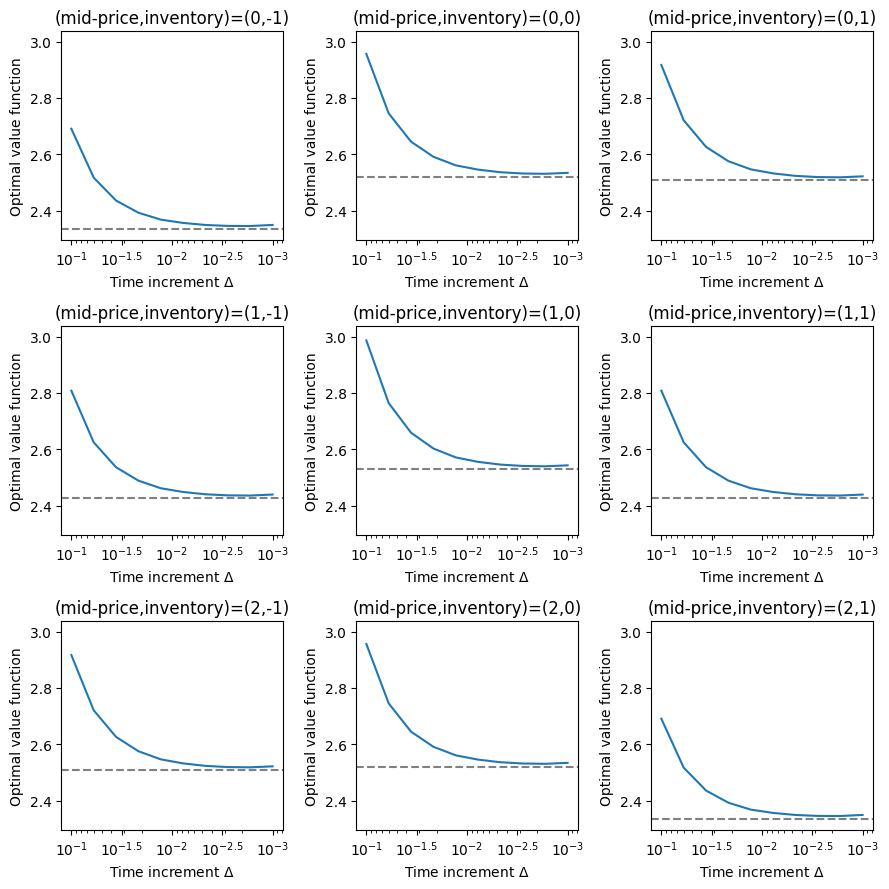

In [17]:
global_min = np.min(V_star_list)
global_max = np.max(V_star_list)
import numpy as np
import matplotlib.pyplot as plt

# Your initial setup
# ... [rest of your initial setup code]

# Updated plotting code with individual horizontal lines for each subplot
# fig, axs = plt.subplots(dim_midprice_grid, dim_inventory_grid, figsize=(11, 11)) # the size for paper

fig, axs = plt.subplots(dim_midprice_grid, dim_inventory_grid, figsize=(9, 9)) # the size for slides

for idx_midprice in range(dim_midprice_grid):
    for idx_inventory in range(dim_inventory_grid):
        # Extracting data for each subplot
        subplot_data = V_star_list[:, idx_midprice, idx_inventory]

        # Plotting with a logarithmic scale on the x-axis
        axs[idx_midprice, idx_inventory].semilogx(Delta_list, subplot_data)
        axs[idx_midprice, idx_inventory].set_title(f"(mid-price,inventory)=({idx_midprice},{idx_inventory-1})")
        axs[idx_midprice, idx_inventory].set_xlabel("Time increment $\Delta$")
        axs[idx_midprice, idx_inventory].set_ylabel("Optimal value function")
        specific_xticks = [10**(-1), 10**(-1.5), 10**(-2), 10**(-2.5), 10**(-3)]
        axs[idx_midprice, idx_inventory].set_xticks(specific_xticks, [f'$10^{{-{1}}}$', f'$10^{{-{1.5}}}$', f'$10^{{-{2}}}$', f'$10^{{-{2.5}}}$', f'$10^{{-{3}}}$'])
        
        
        axs[idx_midprice, idx_inventory].set_ylim(global_min-0.05, global_max+0.05)

        # Adding a horizontal line at the minimum value of each subplot's data
        min_value_subplot = np.min(subplot_data)
        axs[idx_midprice, idx_inventory].axhline(y=min_value_subplot-0.01, color='gray', linestyle='--')

        # Reversing the x-axis
        axs[idx_midprice, idx_inventory].invert_xaxis()

plt.tight_layout()
# plt.savefig('V_convergence_vs_Delta_slides.eps', format='eps')
plt.show()

# check RL

In [29]:
def print_test(agent):
    print("policy error: ", f'{agent.result_metrics()}'  )
    agent.plot_V_error_result()
    agent.plot_Q_table()

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from q_learning_ucb import QLearningAgent
from market import MarketEnvironment

# Example usage
dim_price_grid = 2 # N_P: price grid dimension - 1 (because we start from 0)
bound_inventory = 1 # N_Y: (inventory grid dimension - 1)/2 (because we allow both - and + and 0)
dim_midprice_grid = 2*dim_price_grid-1
dim_inventory_grid = 2*bound_inventory+1
dim_action_ask_price = dim_price_grid+2
dim_action_buy_price = dim_price_grid+2

In [37]:
import importlib
import q_learning_ucb

importlib.reload(q_learning_ucb)  # 重新加载模块

from q_learning_ucb import QLearningAgent  # 重新导入对象

Iteration: 0
V error: 0.14995903149600087
Iteration: 5000
V error: 0.14768780776361234
Iteration: 10000
V error: 0.12630222390833712
Iteration: 15000
V error: 0.10991812533576484
policy error:  2


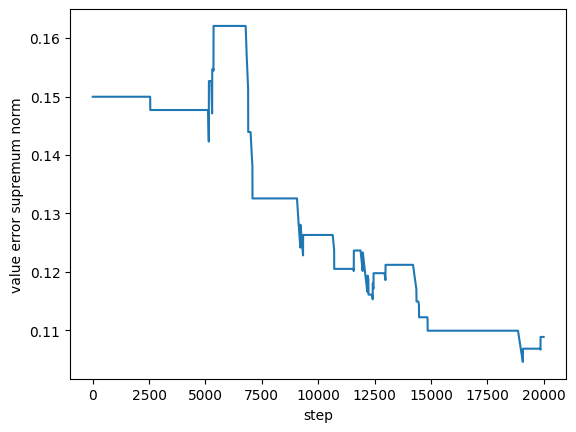

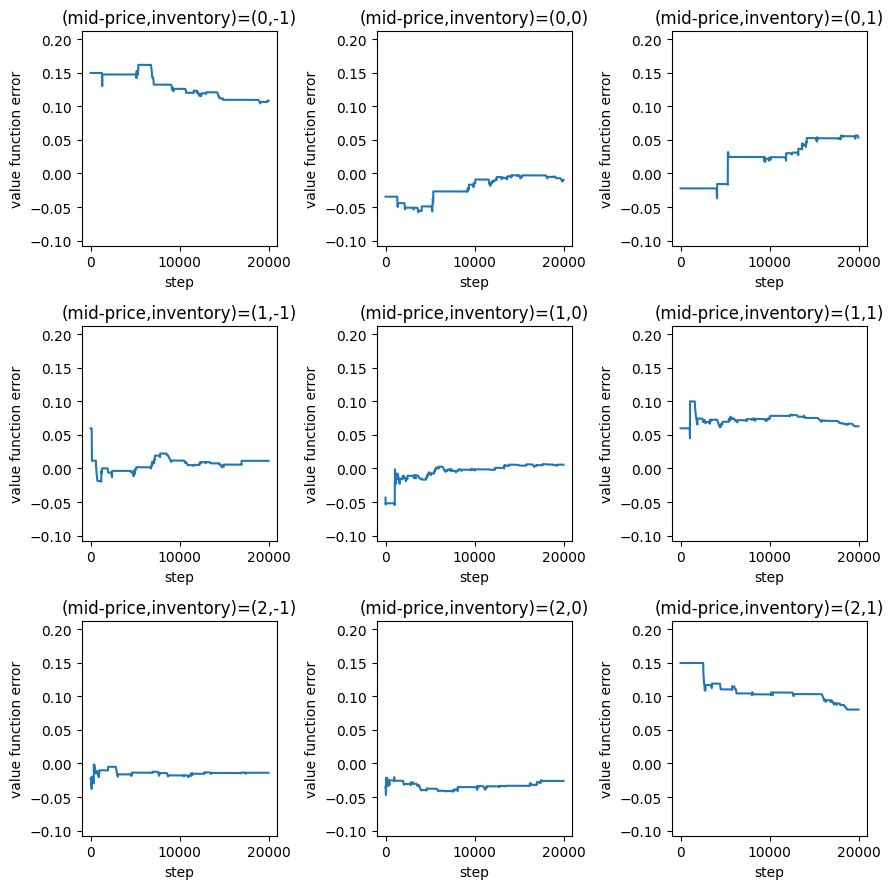

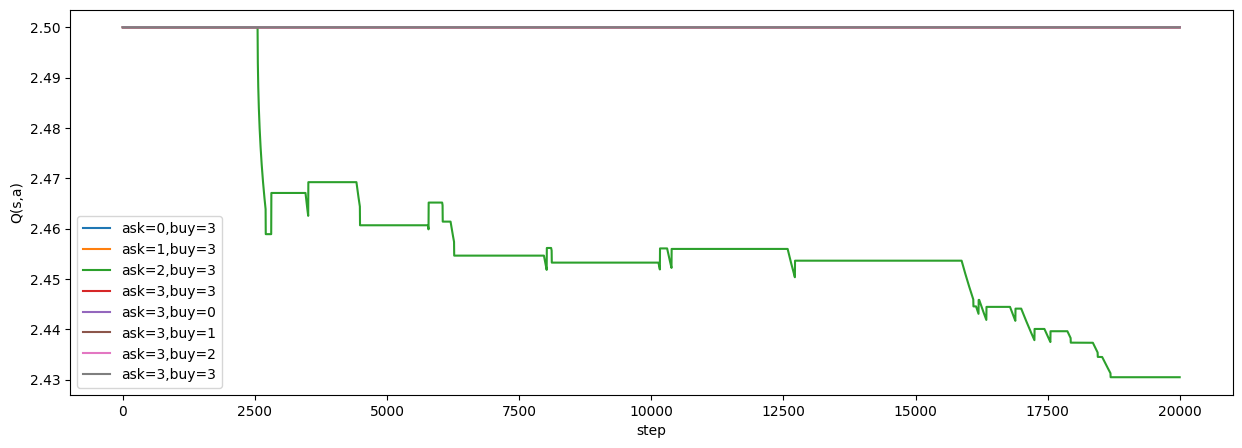

In [38]:
Delta = 0.001

env = MarketEnvironment(dim_price_grid, bound_inventory, dim_action_ask_price, dim_action_buy_price, Delta)
env.reset()

agent_1 = QLearningAgent(env, dim_midprice_grid, dim_inventory_grid, dim_action_ask_price, dim_action_buy_price, Delta, 
                            UCB=False, 
                            V_RL_iter_threshold = 0.1, V_RL_iter_initial = 2.5, N_RL_iter=2*10**4, N_learning_steps=2*10**4,
                        lr=1.0, lr_exponent=0.634, exp0=0.95, exp_epoch=10,  exp=0.9, 
                        Bellman_iter_V_initial=2.5, N_Bellman_iter = 1000, Bellman_iter_threshold=1e-5)
# agent.print_true_values_and_plot_Bellman_iteration()
np.random.seed(999)
agent_1.update()
print_test(agent_1)

In [39]:
agent_1.action_ask_price_RL

array([[3., 1., 2.],
       [3., 2., 2.],
       [3., 2., 2.]])

In [40]:
agent_1.action_buy_price_RL

array([[0., 0., 3.],
       [0., 0., 3.],
       [1., 0., 3.]])

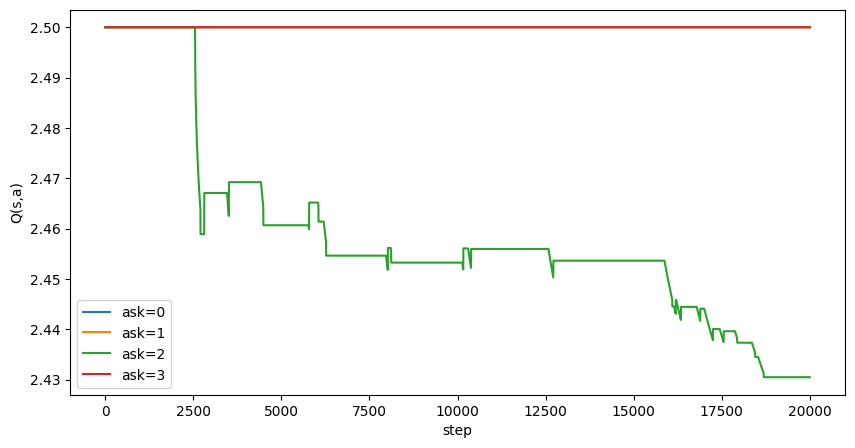

In [41]:
def plot_Q_table(agent,idx_midprice=2, idx_inventory=2):
    plt.figure(1, figsize=(10, 5))
    M=agent.N_RL_iter
    idx_buy_price = 3
    for idx_ask_price in range(dim_action_ask_price):
        plt.plot(agent.Q_table_track[idx_midprice, idx_inventory, idx_ask_price, idx_buy_price,:M], label=f'ask={idx_ask_price}')
    # idx_ask_price = 3
    # for idx_buy_price in range(dim_action_buy_price):
    #     plt.plot(agent.Q_table_track[idx_midprice, idx_inventory, idx_ask_price, idx_buy_price,:M], label=f'buy={idx_buy_price}')
    plt.legend()
    plt.xlabel('step')
    plt.ylabel('Q(s,a)')
    plt.show()
plot_Q_table(agent_1)

Iteration: 0
V error: 0.14995903149600087
Iteration: 5000
V error: 0.13550804436598574
Iteration: 10000
V error: 0.11079617410731446
Iteration: 15000
V error: 0.11079617410731446
policy error:  0


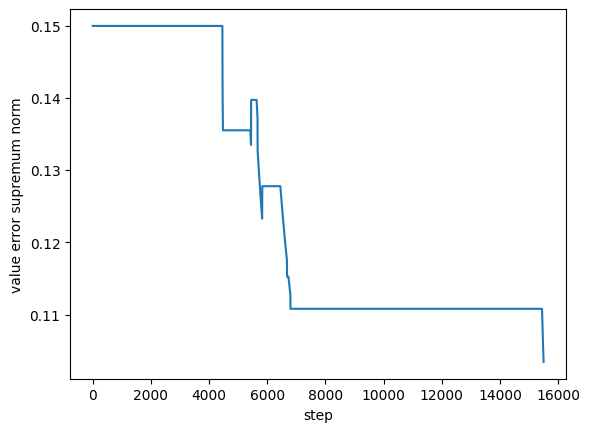

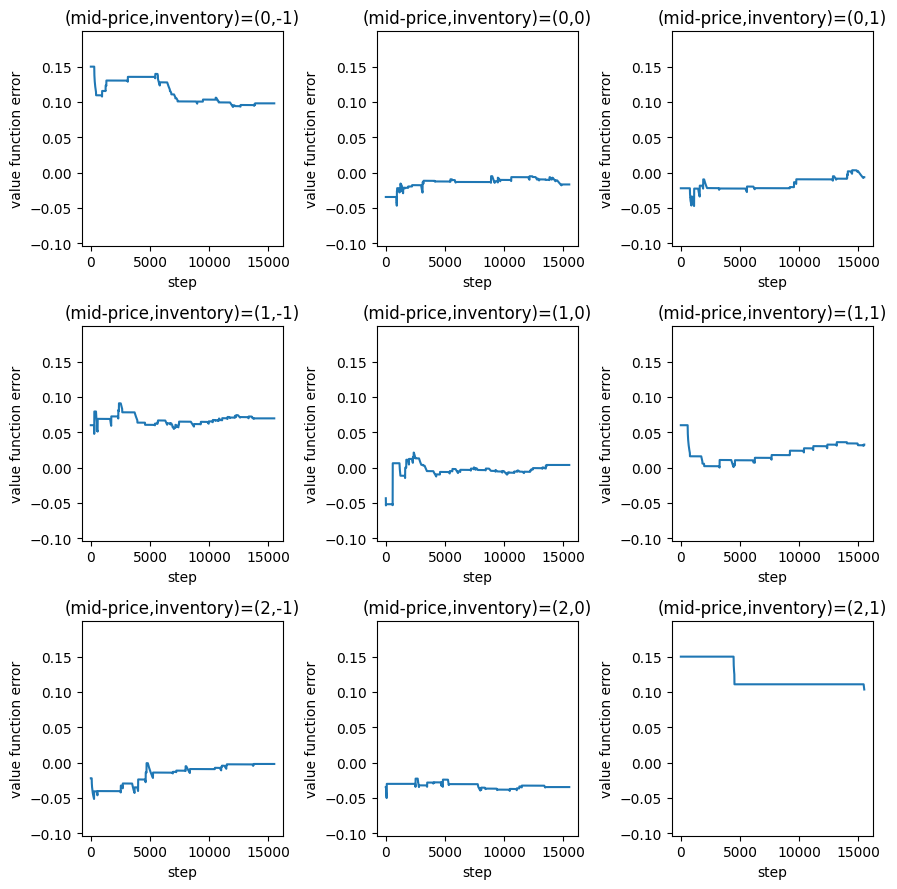

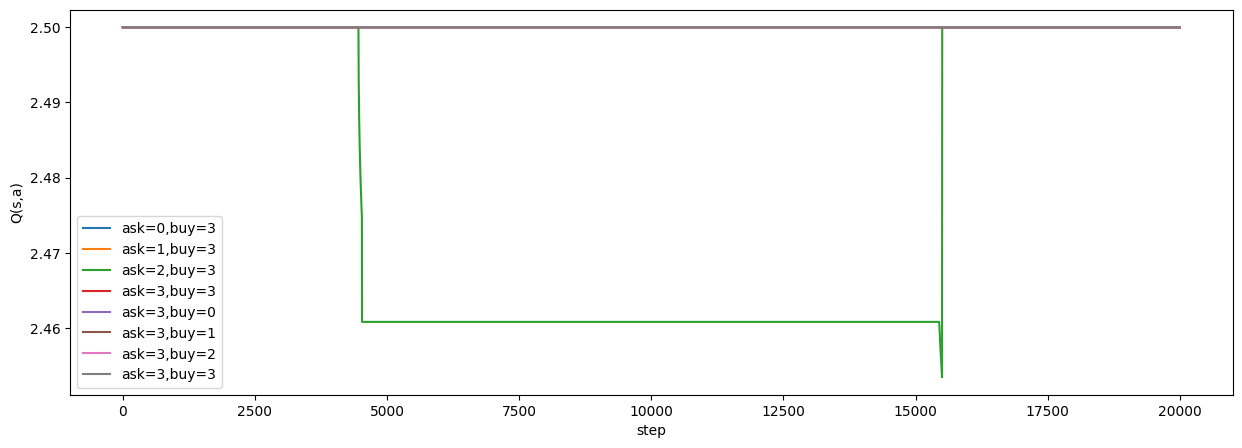

In [42]:
Delta = 0.001

env = MarketEnvironment(dim_price_grid, bound_inventory, dim_action_ask_price, dim_action_buy_price, Delta)
env.reset()

agent_2 = QLearningAgent(env, dim_midprice_grid, dim_inventory_grid, dim_action_ask_price, dim_action_buy_price, Delta, 
                            UCB=False, 
                            V_RL_iter_threshold = 0.1, V_RL_iter_initial = 2.5, N_RL_iter=2*10**4, N_learning_steps=2*10**4,
                        lr=1.0, lr_exponent=0.634, exp0=0.95, exp_epoch=10,  exp=0.7, 
                        Bellman_iter_V_initial=2.5, N_Bellman_iter = 1000, Bellman_iter_threshold=1e-5)
# agent.print_true_values_and_plot_Bellman_iteration()
np.random.seed(999)
agent_2.update()
print_test(agent_2)

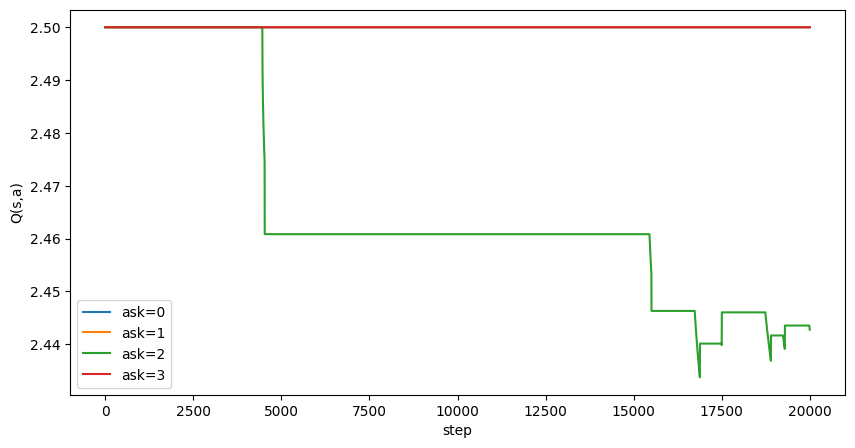

In [26]:
def plot_Q_table(agent,idx_midprice=2, idx_inventory=2):
    plt.figure(1, figsize=(10, 5))
    M=agent.N_RL_iter
    idx_buy_price = 3
    for idx_ask_price in range(dim_action_ask_price):
        plt.plot(agent.Q_table_track[idx_midprice, idx_inventory, idx_ask_price, idx_buy_price,:M], label=f'ask={idx_ask_price}')
    # idx_ask_price = 3
    # for idx_buy_price in range(dim_action_buy_price):
    #     plt.plot(agent.Q_table_track[idx_midprice, idx_inventory, idx_ask_price, idx_buy_price,:M], label=f'buy={idx_buy_price}')
    plt.legend()
    plt.xlabel('step')
    plt.ylabel('Q(s,a)')
    plt.show()
plot_Q_table(agent_2)

In [43]:
print(agent_2.action_ask_price_RL)
print(agent_2.action_buy_price_RL)

[[3. 2. 2.]
 [3. 2. 2.]
 [3. 2. 2.]]
[[0. 0. 3.]
 [0. 0. 3.]
 [0. 0. 3.]]


## 2player

In [ ]:
# Example usage
dim_price_grid = 4 # N_P: price grid dimension - 1 (because we start from 0)
dim_midprice_grid = 2*dim_price_grid-1
dim_action_ask_price = dim_price_grid+2
dim_action_buy_price = dim_price_grid+2
Delta = 0.1
from market_2 import MarketEnvironment
from Nash_solver import get_action_from_nash, get_nash_value, get_policy_from_nash
env = MarketEnvironment(dim_price_grid, Delta)

solver = 'LP'
GAMMA = 0.95
GAMMA_Delta = np.exp(-GAMMA*Delta)
value_initial = 3.6

V_max_increment = float('inf')

Bellman_iter_threshold = 1e-4
N_Bellman_iter=150

V_true_converge_track_1 = np.zeros((dim_midprice_grid, N_Bellman_iter)) + value_initial
V_true_converge_track_2 = np.zeros((dim_midprice_grid, N_Bellman_iter)) + value_initial
Q_table_true_1 = dict()
Q_table_true_2 = dict()
#Q_table_true_track_1 = dict()
#Q_table_true_track_2 = dict()
for idx_midprice in range(dim_midprice_grid):
    midprice_integer = idx_midprice + 1 # midprice=midprice_integer*tick_size/2 and midprice_integer is in (1,2,...,self.dim_midprice_grid)
    action_ask_price_list = env.price_list[env.price_list>midprice_integer/2] # the action is exactly equal to the index
    action_buy_price_list = env.price_list[env.price_list<midprice_integer/2] # the action is exactly equal to the index
    dim_action = len(action_ask_price_list)*len(action_buy_price_list)
    Q_table_true_1[midprice_integer] = np.zeros((dim_action, dim_action)) + value_initial
    Q_table_true_2[midprice_integer] = np.zeros((dim_action, dim_action)) + value_initial
    #Q_table_true_track_1[midprice_integer] = np.zeros((dim_action, dim_action, N_Bellman_iter))
    #Q_table_true_track_2[midprice_integer] = np.zeros((dim_action, dim_action, N_Bellman_iter))

i = -1
while V_max_increment > Bellman_iter_threshold and i<N_Bellman_iter-2:
    i+=1
    V_true_1 = V_true_converge_track_1[:,i]
    V_true_2 = V_true_converge_track_2[:,i]
    V_max_increment = 0
    for idx_midprice in range(dim_midprice_grid):
        midprice_integer = idx_midprice + 1 # midprice=midprice_integer*tick_size/2 and midprice_integer is in (1,2,...,self.dim_midprice_grid)
        action_ask_price_list = env.price_list[env.price_list>midprice_integer/2] # the action is exactly equal to the index
        action_buy_price_list = env.price_list[env.price_list<midprice_integer/2] # the action is exactly equal to the index
        dim_action = len(action_ask_price_list)*len(action_buy_price_list)

        midprice_prob_vector = env.trans_prob_matrix_midprice[idx_midprice, :]
        for idx_optimal_1 in range(dim_action):
            for idx_optimal_2 in range(dim_action):
                idx_ask_price_1 = action_ask_price_list[idx_optimal_1//len(action_buy_price_list)]
                idx_buy_price_1 = action_buy_price_list[idx_optimal_1%len(action_buy_price_list)]
                idx_ask_price_2 = action_ask_price_list[idx_optimal_2//len(action_buy_price_list)]
                idx_buy_price_2 = action_buy_price_list[idx_optimal_2%len(action_buy_price_list)]
                prob_ask_order_filled_1, prob_ask_order_filled_2 = env.prob_executed( midprice_integer*env.tick_size/2, idx_ask_price_1*env.tick_size, idx_ask_price_2*env.tick_size, type = "ask" )
                prob_buy_order_filled_1, prob_buy_order_filled_2 = env.prob_executed( midprice_integer*env.tick_size/2, idx_buy_price_1*env.tick_size, idx_buy_price_2*env.tick_size, type = "buy" )
                reward_expected_1 = ( -midprice_integer*env.tick_size/2+idx_ask_price_1*env.tick_size )*prob_ask_order_filled_1 + ( midprice_integer*env.tick_size/2-idx_buy_price_1*env.tick_size )*prob_buy_order_filled_1 # - (inventory**2)*Delta + (midprice_next-midprice_integer)*inventory
                reward_expected_2 = ( -midprice_integer*env.tick_size/2+idx_ask_price_2*env.tick_size )*prob_ask_order_filled_2 + ( midprice_integer*env.tick_size/2-idx_buy_price_2*env.tick_size )*prob_buy_order_filled_2 # - (inventory**2)*Delta + (midprice_next-midprice_integer)*inventory
                Q_table_true_1[midprice_integer][idx_optimal_1, idx_optimal_2] = reward_expected_1 + GAMMA_Delta*np.dot(V_true_1, midprice_prob_vector)
                Q_table_true_2[midprice_integer][idx_optimal_2, idx_optimal_1] = reward_expected_2 + GAMMA_Delta*np.dot(V_true_2, midprice_prob_vector)
                # must switch idx_optimal_1 and idx_optimal_2 for player 2
        V_new_1, V_new_2 = get_nash_value(Q_table_true_1[midprice_integer], Q_table_true_2[midprice_integer], solver)
        V_true_converge_track_1[idx_midprice,i+1] = V_new_1
        V_true_converge_track_2[idx_midprice,i+1] = V_new_2
        V_max_increment = max(V_max_increment, np.max(np.abs(V_new_1-V_true_1[idx_midprice])), np.max(np.abs(V_new_2-V_true_2[idx_midprice])) )

## 1 player